### **Classification Hyperparameter Tuning**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import scipy.stats as stats

**Loading Aggregate Rock Data**


In [266]:
total_rock_df=pd.read_excel('aggregateRockData.xlsx',names=['Rock number','Category number','Subtype number','Token number','Stimulus Type','Frequency responded "Igneous"','Frequency responded "Metamorphic"','Frequency responded "Sedimentary"','Frequency responded "Old"','Frequency responded "New"','Proportion responded "Igneous"','Proportion responded "Metamorphic"','Proportion responded "Sedimentary"','Old'],header=None)
total_rock_df

,Rock number,Category number,Subtype number,Token number,Stimulus Type,"Frequency responded ""Igneous""","Frequency responded ""Metamorphic""","Frequency responded ""Sedimentary""","Frequency responded ""Old""","Frequency responded ""New""","Proportion responded ""Igneous""","Proportion responded ""Metamorphic""","Proportion responded ""Sedimentary""",Old
0,1,1,1,1,2,57,19,6,46,36,0.695122,0.231707,0.073171,0.560976
1,2,1,1,2,3,59,10,13,24,58,0.719512,0.121951,0.158537,0.292683
2,3,1,1,3,3,37,28,17,20,62,0.451220,0.341463,0.207317,0.243902
3,4,1,1,4,3,41,11,30,29,53,0.500000,0.134146,0.365854,0.353659
4,5,1,1,5,3,42,6,34,25,57,0.512195,0.073171,0.414634,0.304878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,716,3,28,18,4,1,0,81,57,25,0.012195,0.000000,0.987805,0.695122
536,717,3,29,17,4,2,44,36,40,42,0.024390,0.536585,0.439024,0.487805
537,718,3,29,18,4,25,9,48,27,55,0.304878,0.109756,0.585366,0.329268
538,719,3,30,17,4,16,46,20,23,59,0.195122,0.560976,0.243902,0.280488


In [267]:
total_rock_df['Category number'].unique()

array([1, 2, 3], dtype=int64)

**Displaying the information of Aggregate Rock Data**

In [269]:
total_rock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rock number                         540 non-null    int64  
 1   Category number                     540 non-null    int64  
 2   Subtype number                      540 non-null    int64  
 3   Token number                        540 non-null    int64  
 4   Stimulus Type                       540 non-null    int64  
 5   Frequency responded "Igneous"       540 non-null    int64  
 6   Frequency responded "Metamorphic"   540 non-null    int64  
 7   Frequency responded "Sedimentary"   540 non-null    int64  
 8   Frequency responded "Old"           540 non-null    int64  
 9   Frequency responded "New"           540 non-null    int64  
 10  Proportion responded "Igneous"      540 non-null    float64
 11  Proportion responded "Metamorphic"  540 non-n

**We are only using Category Number Column from this data (According to the given question)**

In [271]:
rock_df = total_rock_df.iloc[:, [1]]
rock_df

,Category number
0,1
1,1
2,1
3,1
4,1
...,...
535,3
536,3
537,3
538,3


**Loading Feature Presence Data**

In [273]:
features_df_total= pd.read_csv('feature_presence540.txt', sep="\s+",names=['Rock number','Subtype number','Token number','Angular fragments','Rounded fragments','Straight stripes','Curved stripes','Physical layers','Veins','Oily/shimmery texture','Splotchy texture',
            'Single translucent crystal','Multiple cubic crystals','Sandy texture','Fragments','Stripes','Crystals'],nrows=540)
features_df_total

,Rock number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
0,1,1,1,0.20,0.15,0.00,0.00,0.00,0.05,0.00,0.30,0.0,0.00,0.10,0.32,0.00,0.00
1,2,1,2,0.65,0.15,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.05,0.05,0.70,0.00,0.05
2,3,1,3,0.60,0.00,0.00,0.00,0.05,0.00,0.00,0.35,0.0,0.00,0.05,0.60,0.00,0.00
3,4,1,4,0.10,0.85,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.00,0.10,0.86,0.00,0.00
4,5,1,5,0.35,0.80,0.00,0.00,0.00,0.00,0.00,0.10,0.0,0.00,0.05,0.87,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,716,28,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,1.00,0.00,0.00,0.00,1.00
536,717,29,17,0.00,0.00,0.85,0.05,0.15,0.05,0.00,0.00,0.0,0.00,0.40,0.00,0.86,0.00
537,718,29,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,0.00,0.00
538,719,30,17,0.00,0.00,0.00,0.00,0.55,0.10,0.05,0.05,0.0,0.00,0.00,0.00,0.00,0.00


**Select the required Column from this data(According to the given question)**

In [275]:
features_df = features_df_total.iloc[:, 2:14]
features_df

,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,0.20,0.15,0.00,0.00,0.00,0.05,0.00,0.30,0.0,0.00,0.10
1,2,0.65,0.15,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.05,0.05
2,3,0.60,0.00,0.00,0.00,0.05,0.00,0.00,0.35,0.0,0.00,0.05
3,4,0.10,0.85,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.00,0.10
4,5,0.35,0.80,0.00,0.00,0.00,0.00,0.00,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
535,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,1.00,0.00
536,17,0.00,0.00,0.85,0.05,0.15,0.05,0.00,0.00,0.0,0.00,0.40
537,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00
538,17,0.00,0.00,0.00,0.00,0.55,0.10,0.05,0.05,0.0,0.00,0.00


**Now Combine the required columns for getting the Final data**

In [277]:
rock_data_input = pd.concat([rock_df, features_df], axis=1)
rock_data_input

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,1,0.20,0.15,0.00,0.00,0.00,0.05,0.00,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.00,0.00,0.05,0.00,0.00,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.00,0.00,0.05,0.00,0.00,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.00,0.00,0.00,0.00,0.00,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.0,1.00,0.00
536,3,17,0.00,0.00,0.85,0.05,0.15,0.05,0.00,0.00,0.0,0.00,0.40
537,3,18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00
538,3,17,0.00,0.00,0.00,0.00,0.55,0.10,0.05,0.05,0.0,0.00,0.00


**We will use only the first 480 rows (so ignore rows 481 to 720) As given in the question**

In [279]:
rock_data=rock_data_input.iloc[:480, :]
rock_data

,Category number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,3,12,0.00,0.00,0.0,0.0,0.60,0.05,0.0,0.00,0.0,0.00,0.30
476,3,13,0.00,0.00,0.0,0.0,0.40,0.00,0.0,0.05,0.0,0.00,0.35
477,3,14,0.00,0.00,0.0,0.0,0.45,0.05,0.0,0.05,0.0,0.00,0.20
478,3,15,0.00,0.00,0.0,0.0,0.40,0.10,0.0,0.10,0.0,0.00,0.20


**Displaying the information of Final Data**

In [281]:
rock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             480 non-null    int64  
 1   Token number                480 non-null    int64  
 2   Angular fragments           480 non-null    float64
 3   Rounded fragments           480 non-null    float64
 4   Straight stripes            480 non-null    float64
 5   Curved stripes              480 non-null    float64
 6   Physical layers             480 non-null    float64
 7   Veins                       480 non-null    float64
 8   Oily/shimmery texture       480 non-null    float64
 9   Splotchy texture            480 non-null    float64
 10  Single translucent crystal  480 non-null    float64
 11  Multiple cubic crystals     480 non-null    float64
 12  Sandy texture               480 non-null    float64
dtypes: float64(11), int64(2)
memory usa

**Displaying the Size of Dataset**

In [283]:
print("Dimensions of Data" )
print(rock_data.shape)

Dimensions of Data
(480, 13)


**So, the Final Dataset have 480 rows and 13 columns which means that it totally have 480*13 = 6240 data values present in the dataset**

**Displaying Categorical, Numerical Values**

In [286]:
num_vars = rock_data.select_dtypes(exclude=['object']).columns.to_list()
cat_vars = rock_data.select_dtypes(include=['object']).columns.to_list()

In [287]:
print("Attributes which are continous:")
num_vars

Attributes which are continous:


['Category number',
 'Token number',
 'Angular fragments',
 'Rounded fragments',
 'Straight stripes',
 'Curved stripes',
 'Physical layers',
 'Veins',
 'Oily/shimmery texture',
 'Splotchy texture',
 'Single translucent crystal',
 'Multiple cubic crystals',
 'Sandy texture']

In [288]:
print("Attributes which are categorical:")
cat_vars

Attributes which are categorical:


[]

In [289]:
num_vars.remove('Category number')
num_vars.remove('Token number')

**[1]Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**



In [291]:
rock_data[num_vars].describe()

,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.084479,0.080208,0.067729,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.193996,0.197648,0.194792,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,0.050000,0.050000,0.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,1.000000,1.000000,1.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


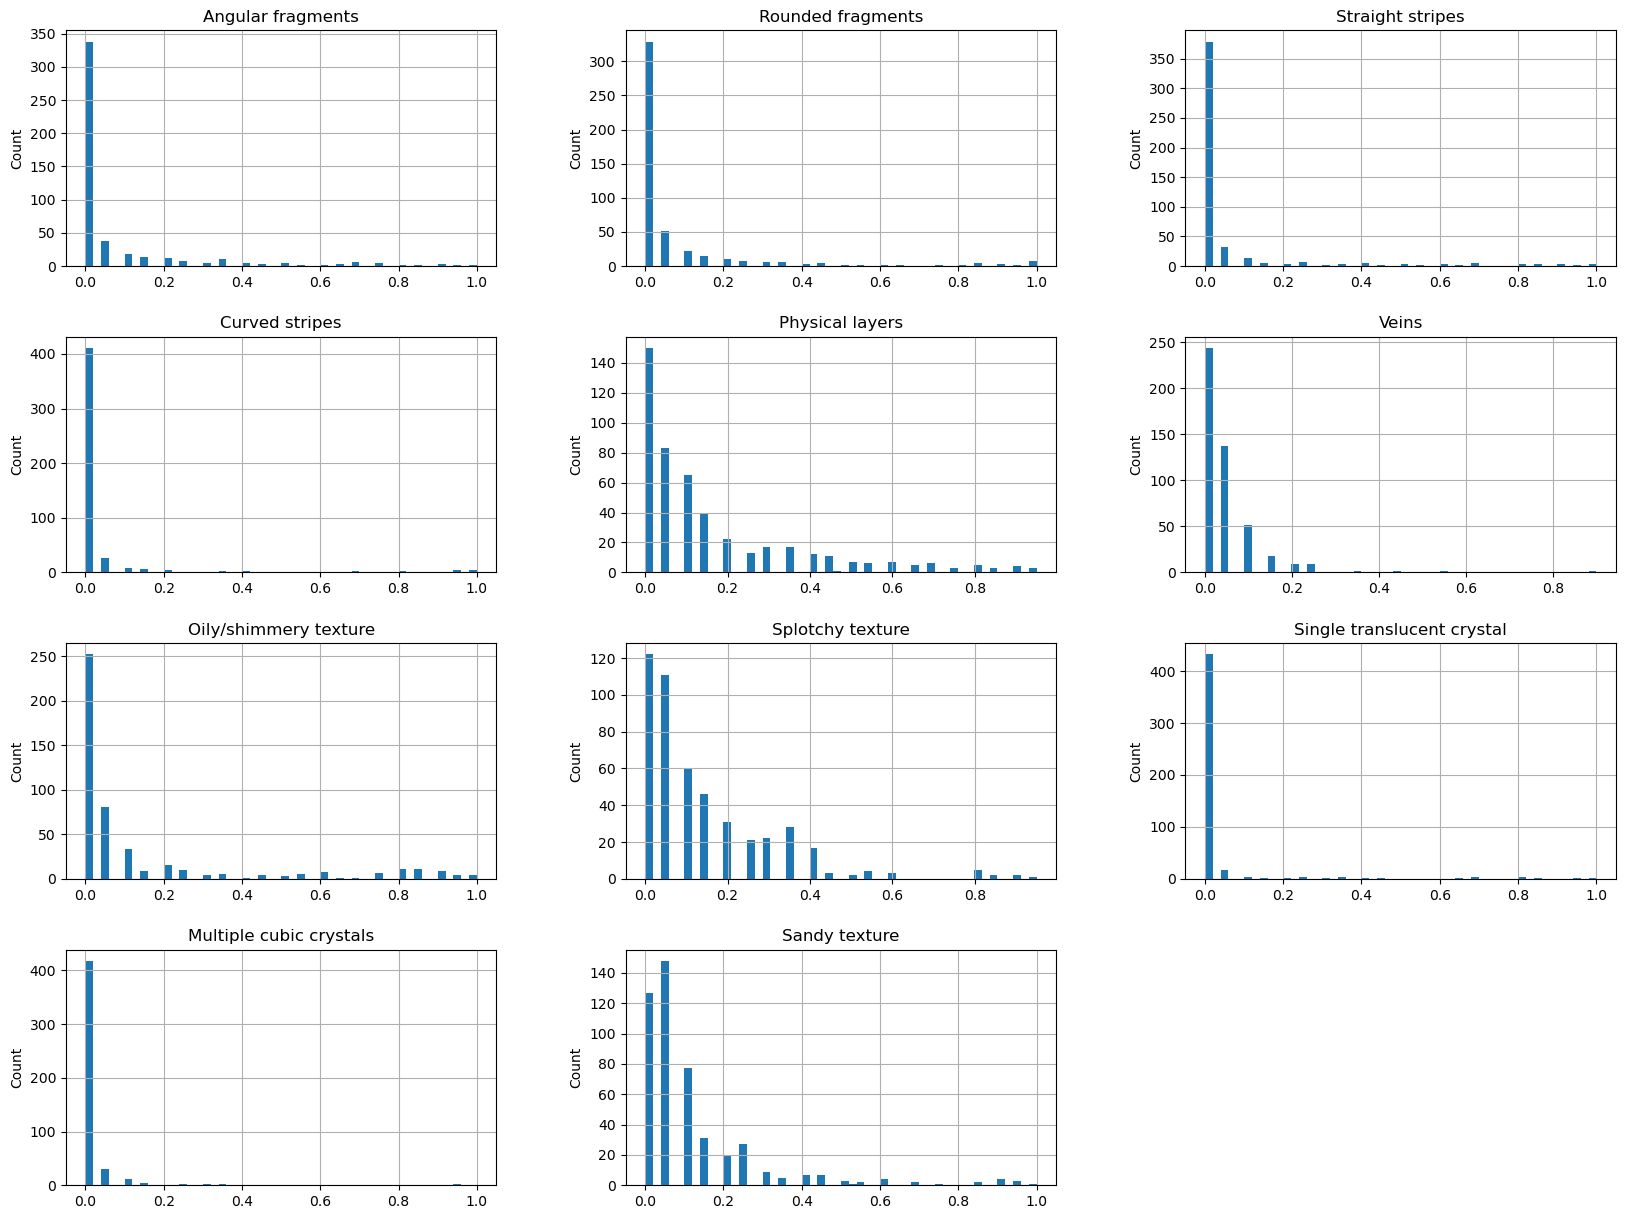

In [292]:
axes = rock_data[num_vars].hist(bins=50, figsize=(20, 15))
for ax in axes.flatten():
    ax.set_ylabel("Count")
plt.show()

**Feature Distribution Summary:**

**Angular Fragments:** The distribution is skewed to the right, indicating a higher frequency of lower values. Values are mainly concentrated between 0 and 0.4.

**Rounded Fragments:** This distribution is also skewed to the right, with a more pronounced tail. Most values are concentrated between 0 and 0.4.

**Straight Stripes:** The distribution is right-skewed, with values primarily between 0 and 0.4.

**Curved Stripes:** This feature has a bimodal distribution with two distinct peaks, one around 0.2 and the other around 0.6.

**Physical Layers:** The distribution is skewed to the right, with the majority of values between 0 and 0.4.

**Veins:** This distribution shows a right skew, with most values concentrated between 0 and 0.4.

**Oily/Shimmery Texture:** The distribution is skewed to the right, with values primarily between 0 and 0.4.**

**Splotchy Texture:** This distribution is also skewed to the right, with most values concentrated between 0 and 0.4.

**Single Translucent Crystal:** The distribution is skewed to the right, with values mainly between 0 and 0.4.

**Multiple Cubic Crystals:** This distribution is right-skewed, with most values concentrated between 0 and 0.4.

**Sandy Texture:** The distribution is skewed to the right, with values primarily between 0 and 0.4.

**General Observations:**
- Most distributions are skewed to the right, showing a higher frequency of lower values.
- A few distributions are bimodal, suggesting the presence of two distinct groups in the data.
- Most feature values are concentrated in the range of 0 to 0.4.

In [294]:
rock_data.isna().sum()

Category number               0
Token number                  0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
dtype: int64

**There are No Null values in the dataset. So, it doesn't require any Special Treatment**

**Now, Let's Check are there any Outliers Present**

In [297]:
def count_outliers_iqr(df):
    outliers_count = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = len(outliers)
    return outliers_count

# Function to find the outlier percentage for a given column
def get_outliers_per(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
    return 100 * len(outliers) / len(df)
def plot_outliers(df, col_names):
    n_cols = 3 
    n_rows = (len(col_names) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)
    axes = axes.flatten()
    for i, col_name in enumerate(col_names):
        outlier_per = get_outliers_per(df, col_name)
        sns.boxplot(x=df[col_name], ax=axes[i])
        axes[i].set_title(f"Box Plot of {col_name} (Outlier %: {outlier_per:.2f})")
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    plt.show()

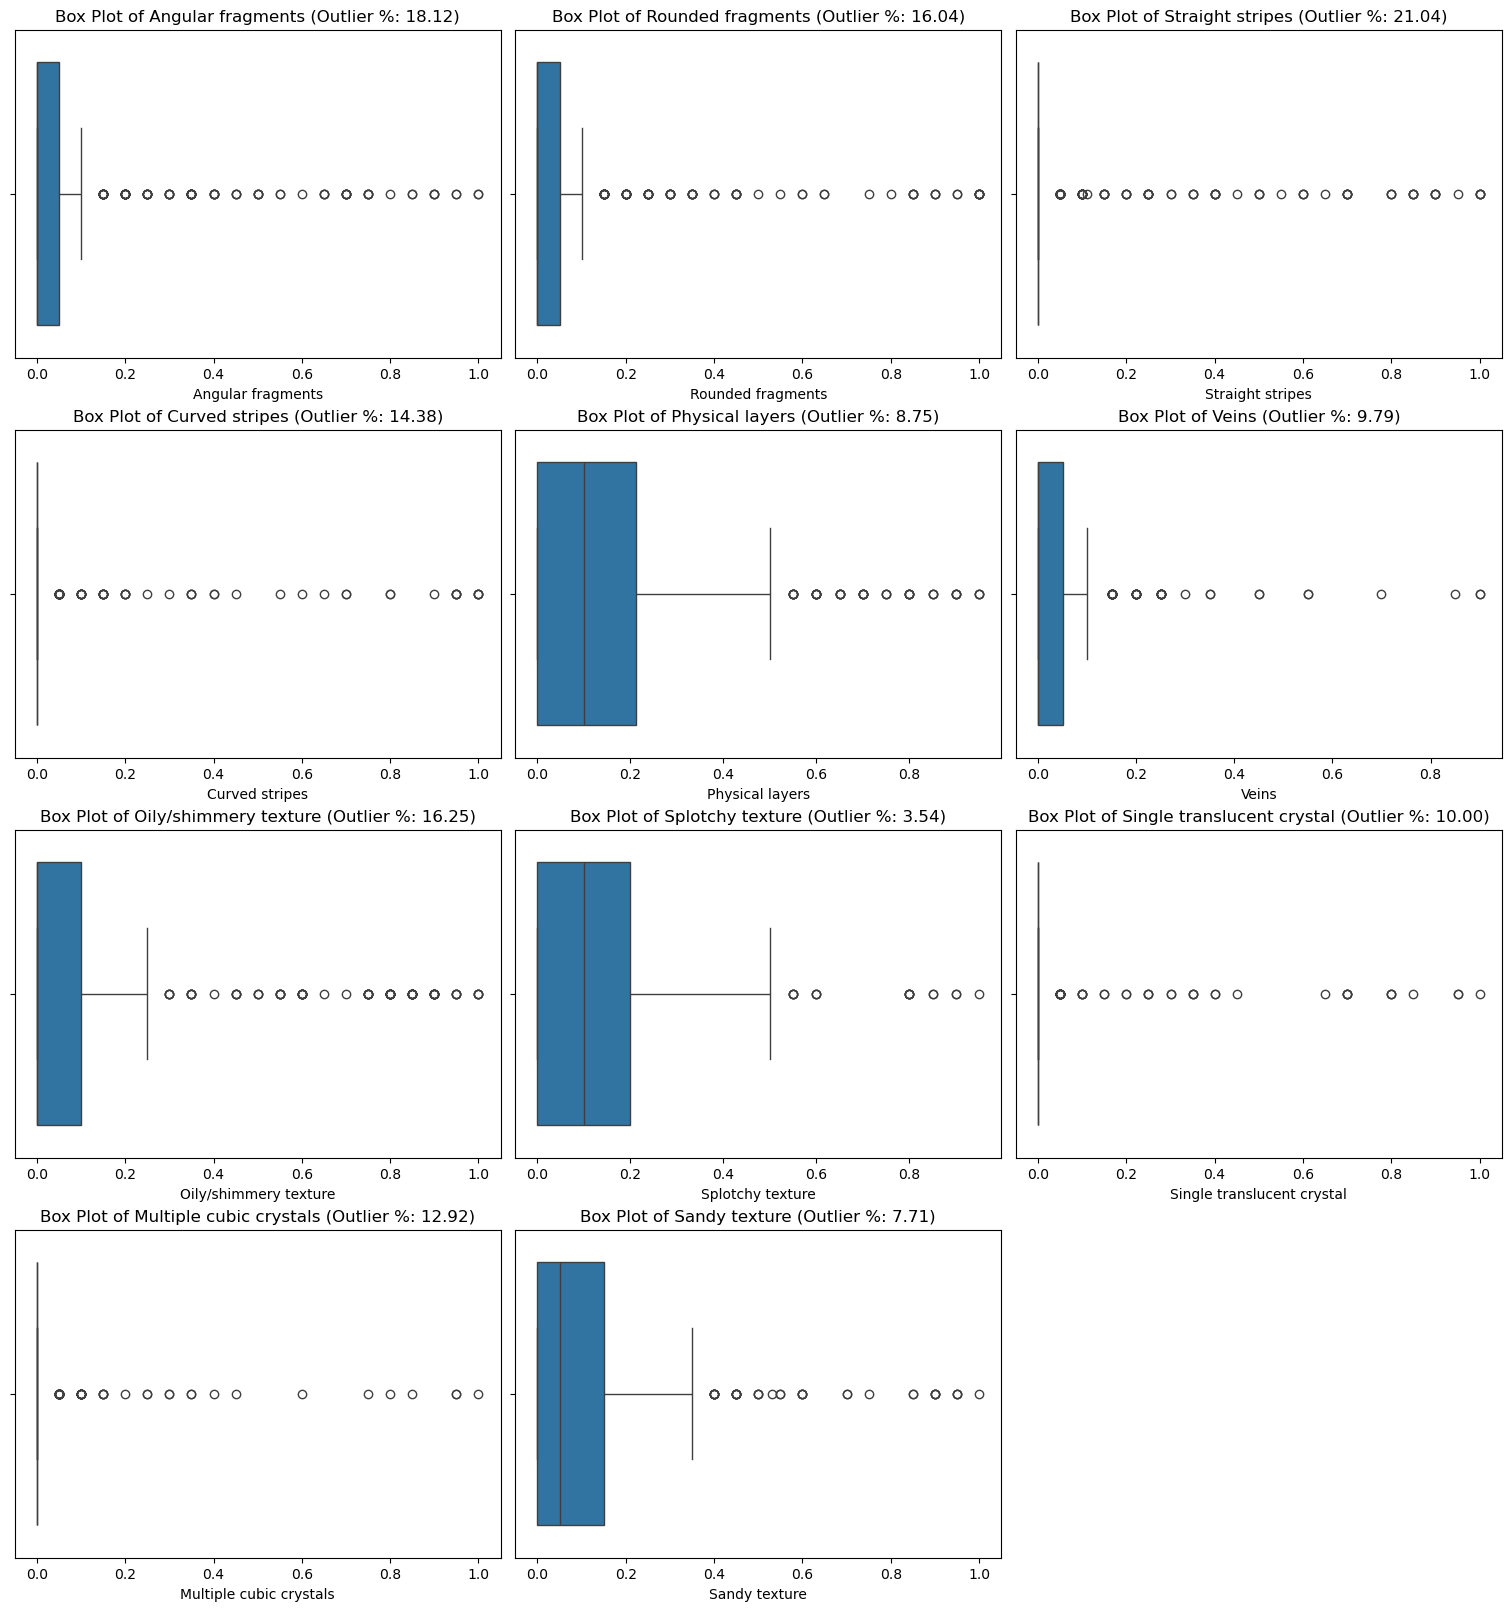

In [298]:
df_base=rock_data.copy()
plot_outliers(df_base[num_vars],num_vars)

In [299]:
# df_trans = apply_power_transform(df, num)
df_trans = df_base.copy()


**If special treatment is required ? :**

When dealing with a high percentage of outliers, methods like trimming, winsorization, and median replacement are generally NOT advisable, as they can significantly alter the data distribution and introduce skewness or bias. These methods might lead to inaccurate results and reduce the reliability of any derived insights. Instead, standardization may be a more effective approach, as it can handle extreme values without heavily distorting the underlying distribution.

**[2]
Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

In [248]:
def get_correlation_plot(df, cols):
    corr_matrix =df[cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix,annot=True,cmap='RdBu',center=0,vmin=-1, vmax=1,linewidths=0.5,fmt=".2f",square=True)
    plt.title("Correlation Matrix", size=16)
    plt.show()
    return

**Pearson Correlation Coefficient(PCC) Matrix**

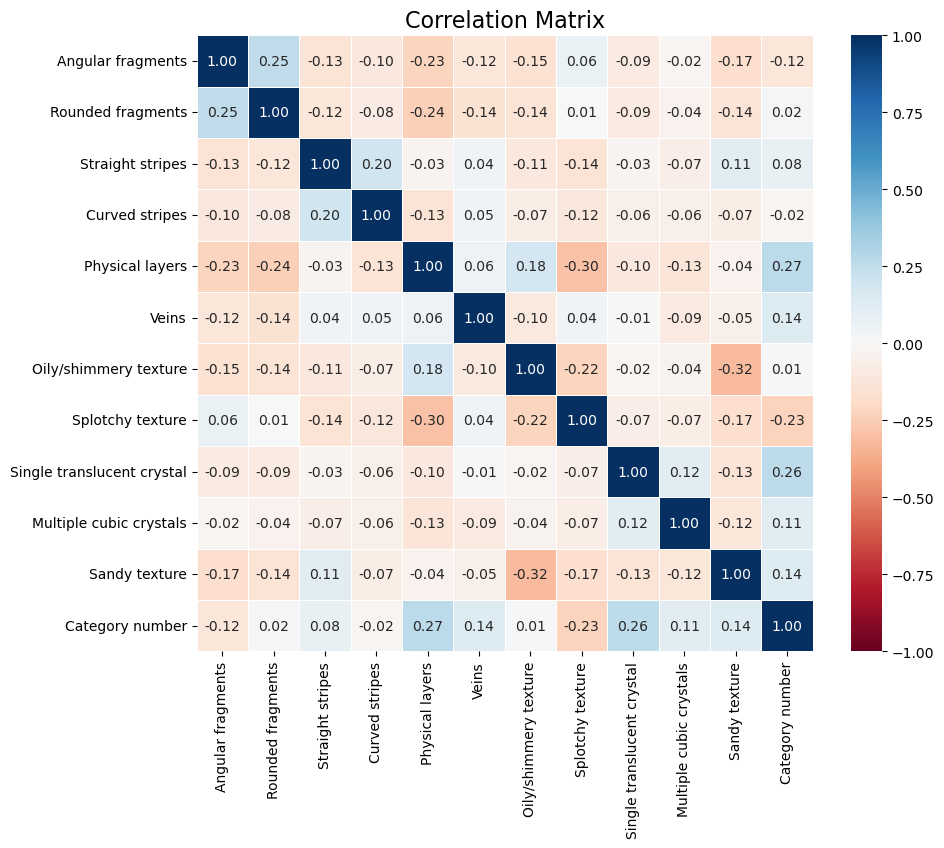

In [253]:
get_correlation_plot(df_trans, num_vars + ['Category number'])

**Key Observations from the Correlation Matrix:**

**Angular Fragments and Rounded Fragments:** A moderate positive correlation (0.25) exists between these two features, suggesting that samples with more angular fragments tend to also have more rounded fragments.

**Straight Stripes and Curved Stripes:** A strong positive correlation (0.20) exists between these two features, indicating that samples with more straight stripes are likely to have more curved stripes.

**Physical Layers:** This feature has a moderate negative correlation with several others:
- -0.24 with Angular Fragments
- -0.24 with Rounded Fragments
- -0.30 with Splotchy Texture
- 0.27 with Category Number

**Veins:** This feature has a moderate positive correlation with Category Number (0.27).

**Oily/Shimmery Texture and Splotchy Texture:** A moderate negative correlation (-0.22) exists between these two features, suggesting that samples with more oily/shimmery texture tend to have fewer splotchy textures.

**Single Translucent Crystal:** This feature has a moderate positive correlation with Category Number (0.26).

**Multiple Cubic Crystals:** This feature has a moderate positive correlation with Sandy Texture (0.11).

**Category Number:** This feature has moderate positive correlations with several others:
- 0.27 with Physical Layers
- 0.26 with Single Translucent Crystal
- 0.25 with Veins

Overall, the correlation matrix reveals several interesting relationships between the different features. Some features are positively correlated, indicating that they tend to occur together, while others are negatively correlated, suggesting that they are inversely related. The Category Number appears to be associated with several features, potentially indicating that these features are important for distinguishing between different categories.

**Scatter Plots**

In [42]:
def get_scatter_plot(df, cols):
    plt.figure(figsize=(12, 10))
    sns.pairplot(df[cols], plot_kws={'s': 10})
    plt.suptitle("Custom Scatter Matrix", size=16, y=1.02)
    plt.show()
    return

<Figure size 1200x1000 with 0 Axes>

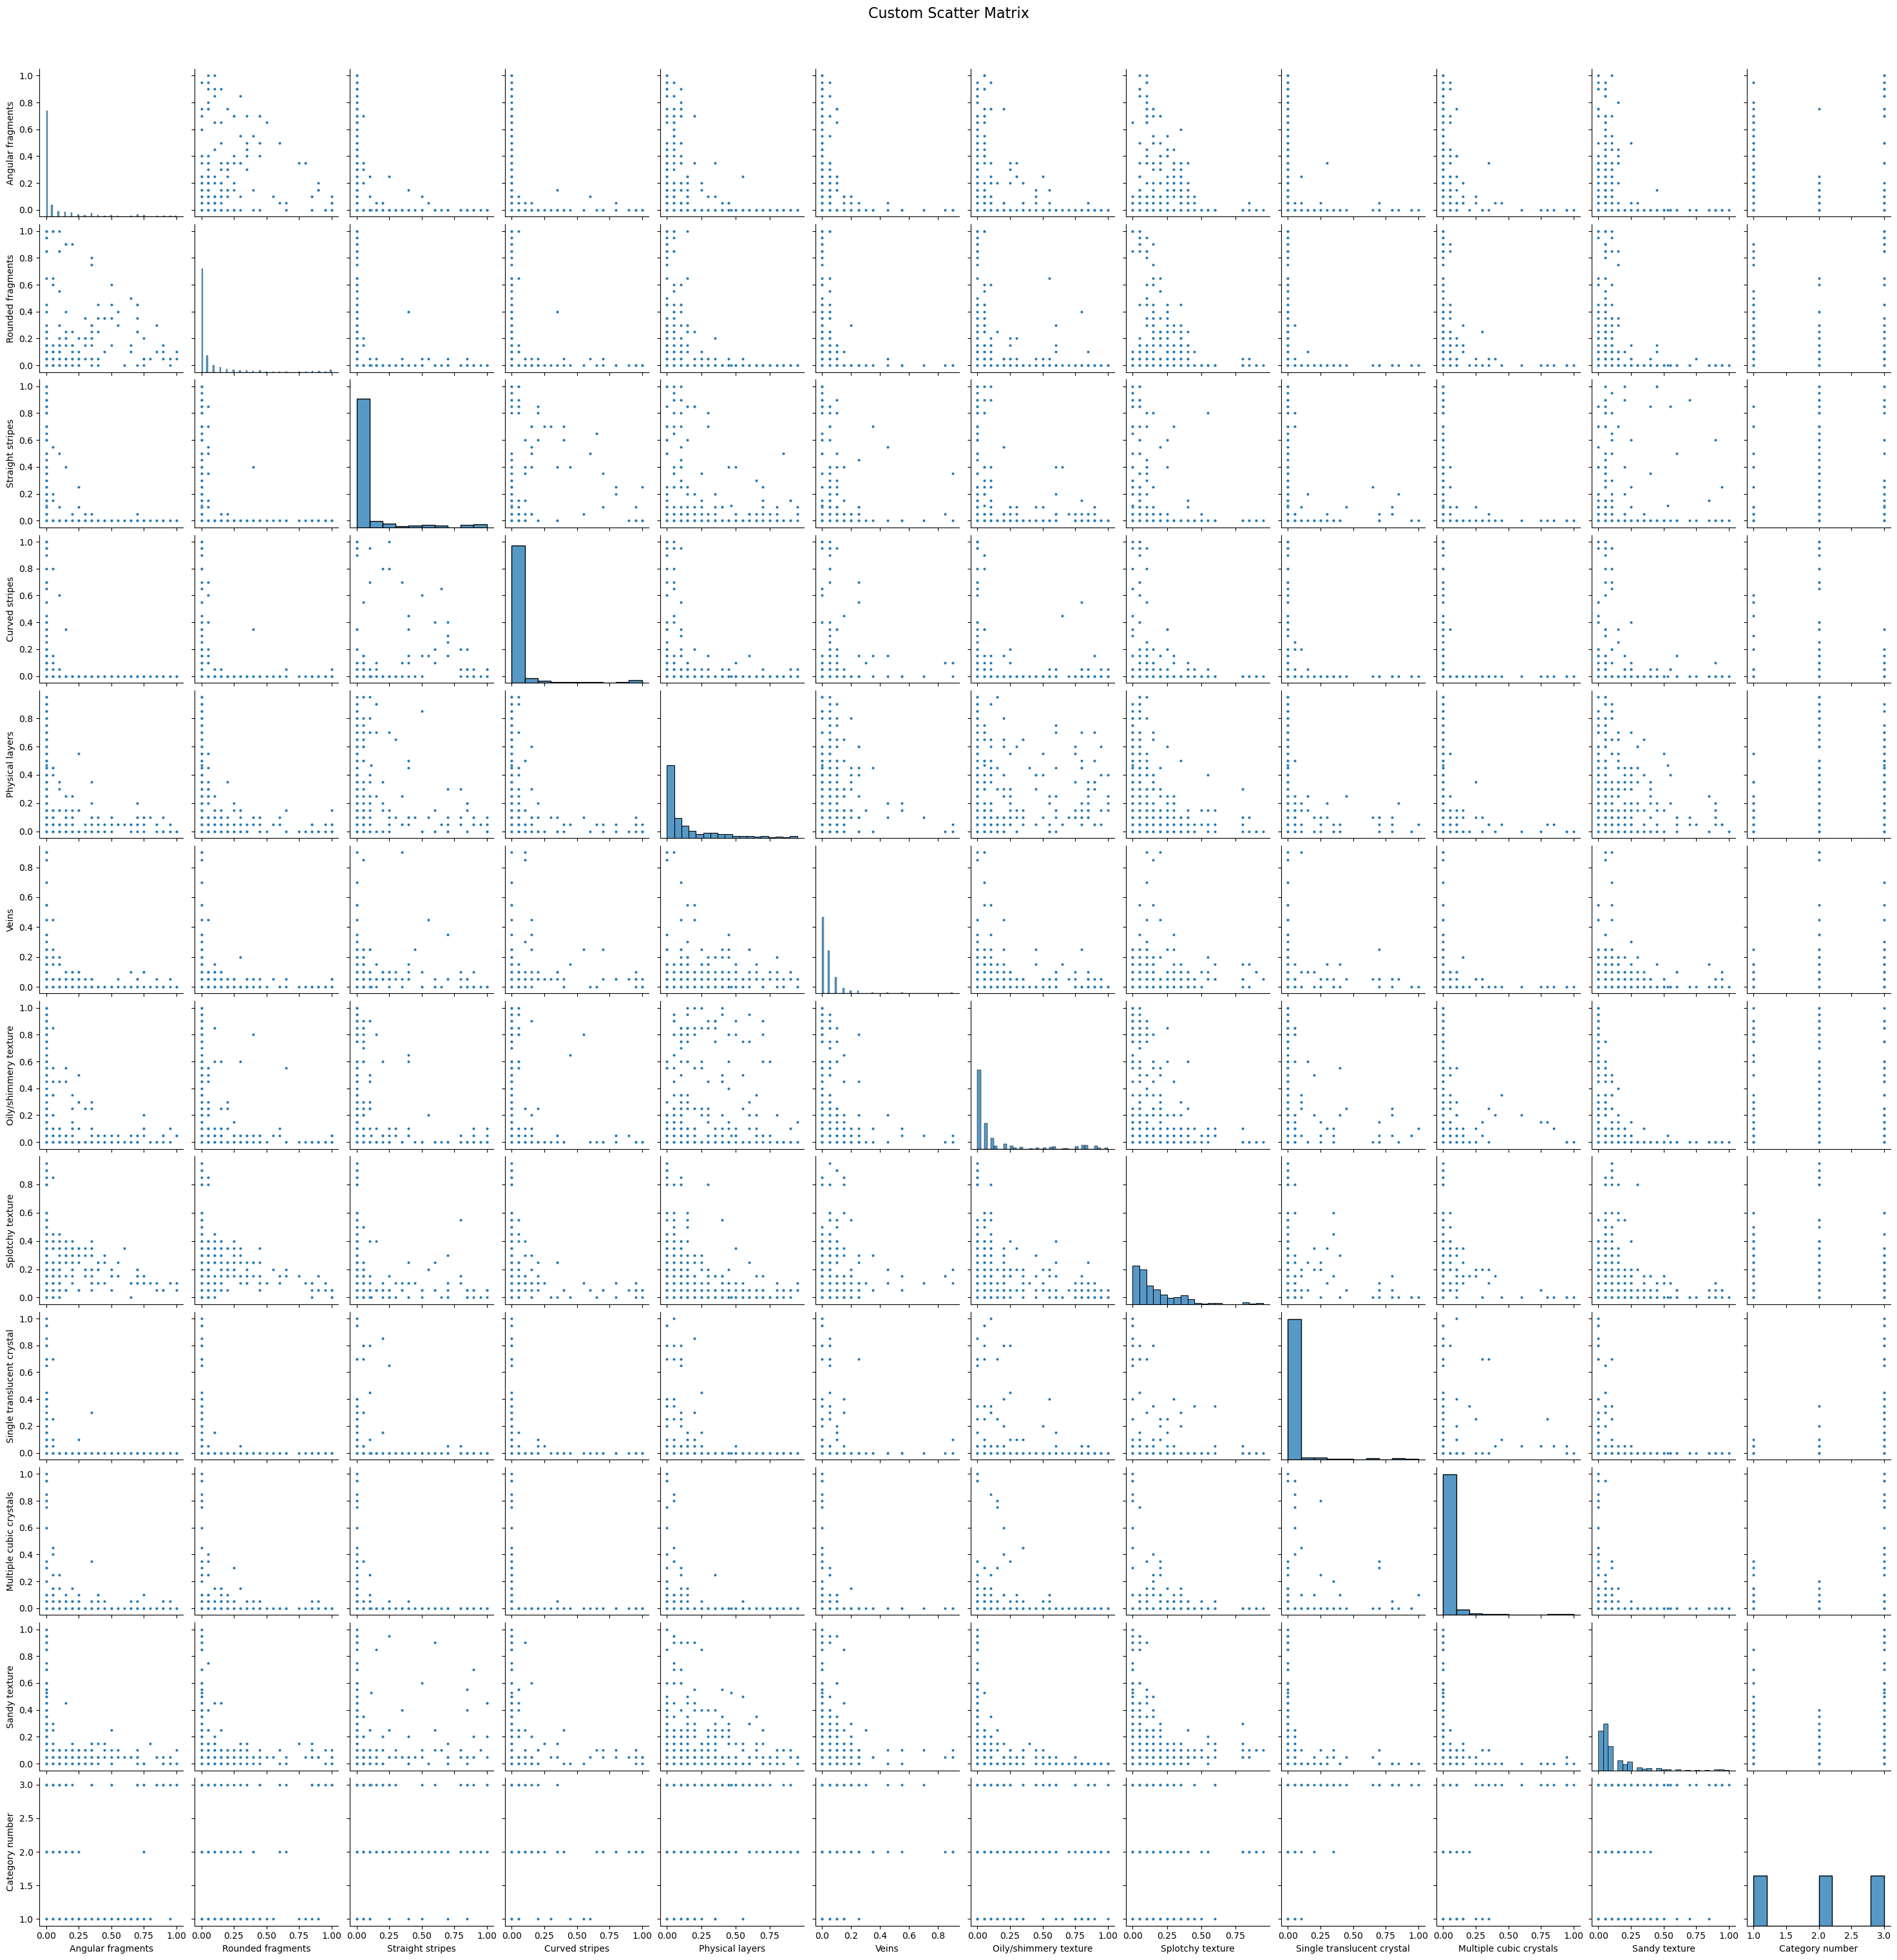

In [263]:
get_scatter_plot(df_trans, num_vars + ['Category number'])

**[3] For training data, use token numbers 1-10, for validation 11 to 13, and for testing 14 to 16 (each of the 30 rock subtypes has 16 token numbers).** 

In [45]:
rock_data.groupby(['Category number'])[['Token number']].count()

,Token number
Category number,
1,160
2,160
3,160


In [46]:
# Select rows where 'Token number' is between 1 and 10 for training data
tr_data = rock_data[(rock_data['Token number'] >= 1) & (rock_data['Token number'] <= 10)]

In [47]:
# Select rows where 'Token number' is between 11 and 13 for validation data
va_data = rock_data[(rock_data['Token number'] >= 11) & (rock_data['Token number'] <= 13)]

In [48]:
# Select rows where 'Token number' is between 14 and 16 for test data
ts_data = rock_data[(rock_data['Token number'] >= 14) & (rock_data['Token number'] <= 16)]

In [49]:
def split_features_target(data, target_column, drop_columns):
    X = data.drop(columns=drop_columns)
    Y = data[target_column]
    return X, Y

# Define columns to drop and the target column
drop_columns = ['Token number', 'Category number']
target_column = 'Category number'

# Apply the function to the entire dataset
X, Y = split_features_target(rock_data, target_column, drop_columns)

# Apply the function to each subset
tr_x, tr_y = split_features_target(tr_data, target_column, drop_columns)
va_x, va_y = split_features_target(va_data, target_column, drop_columns)
ts_x, ts_y = split_features_target(ts_data, target_column, drop_columns)

In [50]:
ftr_order = list(tr_x.columns)

**Now, Let's verify that test and validation portions of the data are representative of the entire dataset.**

In [52]:
# Overall class proportions
overall_proportions = Y.value_counts(normalize=True)
print("Overall Class Proportions:\n", overall_proportions)

# Training class proportions
training_proportions = tr_y.value_counts(normalize=True)
print("\nTraining Class Proportions:\n", training_proportions)

# Validation class proportions
validation_proportions = va_y.value_counts(normalize=True)
print("\nValidation Class Proportions:\n", validation_proportions)

# Testing class proportions
testing_proportions = ts_y.value_counts(normalize=True)
print("\nTesting Class Proportions:\n", testing_proportions)


Overall Class Proportions:
 Category number
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64

Training Class Proportions:
 Category number
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64

Validation Class Proportions:
 Category number
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64

Testing Class Proportions:
 Category number
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64


In [53]:
# Calculate absolute differences
train_diff = abs(training_proportions - overall_proportions)
val_diff = abs(validation_proportions - overall_proportions)
test_diff = abs(testing_proportions - overall_proportions)

# Print average absolute difference for each set
print("Average Absolute Difference in Class Proportions:")
print("Training:", train_diff.mean())
print("Validation:", val_diff.mean())
print("Testing:", test_diff.mean())

Average Absolute Difference in Class Proportions:
Training: 0.0
Validation: 0.0
Testing: 0.0


The average absolute difference in class proportions between the training, validation, and test sets and the overall dataset is 0.0, demonstrating that each subset has identical class distributions to the overall data. This perfect alignment in proportions indicates that the validation and test sets are fully representative of the overall dataset, ensuring consistency across all data splits.

**[4] Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):**

**Let's Scale the Data using Standardization**

In [326]:
scaler = MinMaxScaler()
# Apply the selected scaler to the datasets
tr_x= scaler.fit_transform(tr_x)
va_x = scaler.transform(va_x)
ts_x_= scaler.transform(ts_x)
print(tr_x.shape, va_x.shape, ts_x.shape)

(300, 11) (90, 11) (90, 11)


**[A] Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations.**

In [62]:
# Set the Hyperparameter Grid
param_grid={'C': [0.0001,0.001,0.01,0.1,1,10,100,1000],
            'solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
            'max_iter': [100,200,300,400,500,600,700,800,900,1000]}
# Create a logistic regression model
log_reg_model=LogisticRegression(multi_class='multinomial',random_state=68)
# Perform Grid Search
grid_search_lr=GridSearchCV(estimator=log_reg_model,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy')
# Fit the grid search to the training data
grid_search_lr.fit(tr_x,tr_y)
# Find's Best Parameters and CV Accuracy
best_params_lr=grid_search_lr.best_params_
best_cv_score_lr=grid_search_lr.best_score_
print("Optimal Hyperparameters:", best_params_lr)
print("Best Cross-Validation Accuracy:", best_cv_score_lr)


Optimal Hyperparameters: {'C': 1000, 'max_iter': 100, 'solver': 'newton-cg'}
Best Cross-Validation Accuracy: 0.5066666666666666


The optimal hyperparameters determined are as follows:

**C:** 1000, indicating low regularization, which allows the model to fit the data closely.

**max_iter:** 100, meaning the model was set to converge within 100 iterations.

**solver:** 'newton-cg', suggesting this method was selected for optimizing the multiclass logistic regression.

The best cross-validation accuracy achieved is 50.67%. This level of accuracy indicates that the model has a moderate ability to generalize on unseen data during cross-validation. The choice of hyperparameters may need further tuning to enhance the model's performance.

**Reporting Training Performance**

In [64]:
best_lr = LogisticRegression(**best_params_lr, multi_class='multinomial', random_state=68)
best_lr.fit(tr_x, tr_y)
y_train_pred_lr = best_lr.predict(tr_x)
train_accuracy_lr = accuracy_score(tr_y, y_train_pred_lr)
print(f"Training Accuracy: {train_accuracy_lr}")
print("Logistic Regression Training Performance (Accuracy, Precision, Recall, and F1 Score):\n")
print(classification_report(tr_y, y_train_pred_lr))

Training Accuracy: 0.6733333333333333
Logistic Regression Training Performance (Accuracy, Precision, Recall, and F1 Score):

              precision    recall  f1-score   support

           1       0.70      0.69      0.69       100
           2       0.64      0.66      0.65       100
           3       0.68      0.67      0.68       100

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



The training metrics for the logistic regression model are as follows:

**Training Accuracy:** 67.33%

**Precision:** Ranges from 0.64 to 0.70 across different classes.

**Recall:** Varies slightly, with values from 0.66 to 0.69.

**F1 Score:** Also varies, with a range from 0.67 to 0.69.

These metrics indicate that the model performs relatively consistently across the classes, with an overall training accuracy of 67.33%. The precision, recall, and F1-scores are close, suggesting that the model maintains a balanced performance for the evaluated classes. However, there is still room for improvement in achieving higher precision and recall values.

**Reporting Validation Performance**

In [66]:
y_va_pred_lr=best_lr.predict(va_x)
validation_accuracy_lr=accuracy_score(va_y,y_va_pred_lr)
print(f"Validation Accuracy: {validation_accuracy_lr:}")
print("Logistic Regression Validation Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(va_y,y_va_pred_lr))

Validation Accuracy: 0.7555555555555555
Logistic Regression Validation Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.77      0.90      0.83        30
           2       0.70      0.77      0.73        30
           3       0.82      0.60      0.69        30

    accuracy                           0.76        90
   macro avg       0.76      0.76      0.75        90
weighted avg       0.76      0.76      0.75        90



The validation metrics for the logistic regression model are as follows:

**Validation Accuracy:** 75.56%

**Precision:** Ranges from 0.70 to 0.82 across different classes.

**Recall:** Varies from 0.60 to 0.90.

**F1 Score:** Also varies, with values ranging from 0.69 to 0.83.

These metrics indicate that the model performs well overall, achieving a validation accuracy of 75.56%. The precision, recall, and F1-scores demonstrate a balanced performance, particularly for class 1, which has the highest scores across all metrics. However, there is room for improvement, especially for class 3, which has lower recall and F1-score values.

**Reporting Testing Performance**

In [68]:
y_ts_pred_lr=best_lr.predict(ts_x)
testing_accuracy_lr=accuracy_score(ts_y,y_ts_pred_lr)
print(f"Testing Accuracy: {testing_accuracy_lr}")
print("Logistic Regression Testing Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(ts_y,y_ts_pred_lr))

Testing Accuracy: 0.6666666666666666
Logistic Regression Testing Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.67      0.60      0.63        30
           2       0.74      0.67      0.70        30
           3       0.61      0.73      0.67        30

    accuracy                           0.67        90
   macro avg       0.67      0.67      0.67        90
weighted avg       0.67      0.67      0.67        90



The testing metrics for the logistic regression model are as follows:

**Testing Accuracy:** 66.67%

**Precision:** Ranges from 0.61 to 0.74 across different classes.

**Recall:** Varies from 0.60 to 0.73.

**F1 Score:** Also varies, with values ranging from 0.63 to 0.70.

These metrics indicate that the model's performance on the testing set is fairly consistent, with an overall testing accuracy of 66.67%. The precision, recall, and F1-scores show a balanced performance, although class 1 has lower scores in precision and recall. This suggests the model may struggle to identify class 1 effectively compared to other classes, highlighting an area for potential improvement.








**[B] Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.**

In [70]:
# Set the Hyperparameter Grid
svm_param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'kernel':['linear','rbf','poly','sigmoid'],
                'degree':[3,4,5,6],
                'gamma':['scale','auto']}
# Create SVM model
svm_classifier=SVC(random_state=68,probability=True)
# Perform Grid Search
svm_grid_search=GridSearchCV(svm_classifier,svm_param_grid,cv=5,scoring='accuracy',n_jobs=-1)
# Fit the grid search to the training data
svm_grid_search.fit(tr_x,tr_y)
# Find's Best Parameters and CV Accuracy
best_params_svm=svm_grid_search.best_params_
best_cv_score_svm=svm_grid_search.best_score_
print("Optimal SVM Hyperparameters:",best_params_svm)
print("Best Cross-Validation Accuracy:",best_cv_score_svm)

Optimal SVM Hyperparameters: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.4833333333333333


The optimal hyperparameters for the SVM model are as follows:

**C:** 10, indicating a moderate level of regularization to balance bias and variance.

**degree:** 3, which is relevant for polynomial kernels to control the flexibility of the model.

**gamma:** 'scale', suggesting that the model uses a value based on the number of features to determine the influence of a single training example.

**kernel:** 'rbf', indicating that the radial basis function kernel was chosen for its effectiveness in handling non-linear data.

The best cross-validation accuracy achieved is 48.33%. This accuracy indicates that the model may require further tuning and evaluation, as it shows potential for improvement in its performance on unseen data.

**Reporting Training Performance**

In [72]:
best_svm=SVC(**best_params_svm, probability=True, random_state=68)
best_svm.fit(tr_x, tr_y)
y_train_pred_svm = best_svm.predict(tr_x)
train_accuracy_svm = accuracy_score(tr_y, y_train_pred_svm)
print(f"Training Accuracy: {train_accuracy_svm}")
print("Support Vector Machine Training Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(tr_y,y_train_pred_svm))

Training Accuracy: 0.8133333333333334
Support Vector Machine Training Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.81      0.88      0.85       100
           2       0.81      0.72      0.76       100
           3       0.82      0.84      0.83       100

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



The training metrics for the support vector machine (SVM) model are as follows:

**Training Accuracy:** 81.33%

**Precision:** Ranges from 0.81 to 0.82 across different classes.

**Recall:** Varies from 0.72 to 0.88.

**F1 Score:** Also ranges from 0.76 to 0.85.

These metrics indicate that the model performs well during training, achieving an overall accuracy of 81.33%. The precision, recall, and F1-scores are relatively balanced across the classes, suggesting effective performance. Class 1 shows the highest recall, while class 2 has the lowest recall, indicating some challenges in identifying instances of that class. Overall, the training results suggest a strong model performance, but further evaluation on validation and test data would be beneficial.








**Reporting Validation Performance**

In [74]:
y_validation_pred_svm=best_svm.predict(va_x)
validation_accuracy_svm=accuracy_score(va_y,y_validation_pred_svm)
print(f"Validation Accuracy: {validation_accuracy_svm}")
print("Support Vector Machine Validation Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(va_y,y_validation_pred_svm))

Validation Accuracy: 0.7888888888888889
Support Vector Machine Validation Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.85      0.93      0.89        30
           2       0.75      0.70      0.72        30
           3       0.76      0.73      0.75        30

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



The validation metrics for the support vector machine (SVM) model are as follows:

**Validation Accuracy:** 78.89%

**Precision:** Ranges from 0.75 to 0.85 across different classes.

**Recall:** Varies from 0.70 to 0.93.

**F1 Score:** Also varies, with values ranging from 0.72 to 0.89.

These metrics indicate that the model performs well on the validation set, achieving an overall accuracy of 78.89%. The precision and recall metrics show effective performance, particularly for class 1, which has the highest scores. Class 2 exhibits lower precision and recall, suggesting some difficulties in accurately identifying instances of that class. Overall, the results demonstrate a strong validation performance, with room for improvement in certain areas.

**Reporting Testing Performance**

In [76]:
y_test_pred_svm=best_svm.predict(ts_x)
testing_accuracy_svm=accuracy_score(ts_y,y_test_pred_svm)
print(f"Testing Accuracy: {testing_accuracy_svm}")
print("Support Vector Machine Testing Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(ts_y,y_test_pred_svm))

Testing Accuracy: 0.7222222222222222
Support Vector Machine Testing Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.68      0.83      0.75        30
           2       0.89      0.53      0.67        30
           3       0.69      0.80      0.74        30

    accuracy                           0.72        90
   macro avg       0.75      0.72      0.72        90
weighted avg       0.75      0.72      0.72        90



The testing metrics for the support vector machine (SVM) model are as follows:

**Testing Accuracy:** 72.22%

**Precision:** Ranges from 0.68 to 0.89 across different classes.

**Recall:** Varies from 0.53 to 0.83.

**F1 Score:** Also varies, with values ranging from 0.67 to 0.75.

These metrics indicate that the model's performance on the testing set is moderate, achieving an overall accuracy of 72.22%. While precision is high for class 2, its recall is notably lower, suggesting that the model struggles to identify instances of that class accurately. Class 1 has a higher recall, indicating better performance in detecting those instances. Overall, the testing results show a balanced performance, but there is room for improvement, particularly for class 2.

**[C] Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.**

In [78]:
# Set the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}
# Create a Random Forest Classifier
rf_model=RandomForestClassifier(random_state=68)
# Perform Grid Search
grid_search_randomforest= GridSearchCV(rf_model,param_grid,cv=5,n_jobs=-1,verbose=1)
# Fit the grid search to the training data
grid_search_randomforest.fit(tr_x,tr_y)
# Get the best parameters
best_params=grid_search_randomforest.best_params_
# Find's Best Parameters and CV Accuracy
best_params_rf=grid_search_randomforest.best_params_
best_score_rf=grid_search_randomforest.best_score_
print("Best RF Hyperparameters:", best_params_rf)
print("Best Cross-Validation Accuracy:", best_score_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.47333333333333344


The optimal hyperparameters for the random forest model are as follows:

**max_depth:** None, allowing the trees to grow until all leaves are pure or contain fewer than the minimum samples required.

**min_samples_leaf:** 1, indicating that a leaf can have a minimum of one sample.

**min_samples_split:** 5, specifying the minimum number of samples required to split an internal node.

**n_estimators:** 50, meaning the model uses 50 trees in the forest.

The best cross-validation accuracy achieved is 47.33%. This accuracy suggests that the model may need further tuning to improve its performance on unseen data.

**Reporting Training Performance**

In [80]:
best_rf= RandomForestClassifier(**best_params_rf, random_state=42, n_jobs=1)
best_rf.fit(tr_x, tr_y)
y_train_pred_rf = best_rf.predict(tr_x)
training_accuracy_rf=accuracy_score(tr_y,y_train_pred_rf)
print(f"Training Accuracy: {training_accuracy_rf}")
print("Random Forest Training Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(tr_y,y_train_pred_rf))

Training Accuracy: 0.96
Random Forest Training Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.97      0.98      0.98       100
           2       0.95      0.94      0.94       100
           3       0.96      0.96      0.96       100

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



The training metrics for the random forest model are as follows:

**Training Accuracy:** 96.00%

**Precision:** Ranges from 0.95 to 0.97 across different classes.

**Recall:** Varies from 0.94 to 0.98.

**F1 Score:** Also varies, with values ranging from 0.94 to 0.98.

These metrics indicate that the model performs exceptionally well during training, achieving an overall accuracy of 96.00%. The precision, recall, and F1-scores are consistently high across all classes, suggesting that the model effectively identifies instances of each class. The training results reflect strong performance, though further evaluation on validation and test datasets will be necessary to assess generalization to unseen data.

In [81]:
feature_importance = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})
feature_importance_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)
display(feature_importance_sorted)

,Feature,Importance
4,Physical layers,0.149771
7,Splotchy texture,0.133997
10,Sandy texture,0.130736
6,Oily/shimmery texture,0.104739
0,Angular fragments,0.085386
5,Veins,0.078903
1,Rounded fragments,0.076562
8,Single translucent crystal,0.073663
2,Straight stripes,0.071834
3,Curved stripes,0.051480


The feature importance analysis reveals that "Physical layers," "Splotchy texture," and "Sandy texture" are the most influential characteristics for the model's predictions, each contributing significantly to its performance. In contrast, features like "Multiple cubic crystals" and "Curved stripes" have a lower impact, indicating their lesser relevance in the decision-making process.

**Reporting Validation Performance**

In [83]:
y_validation_pred_rf=best_rf.predict(va_x)
validation_accuracy_rf=accuracy_score(va_y,y_validation_pred_rf)
print(f"Validation Accuracy: {validation_accuracy_rf}")
print("Random Forest Validation Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(va_y,y_validation_pred_rf))

Validation Accuracy: 0.7666666666666667
Random Forest Validation Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.77      0.90      0.83        30
           2       0.74      0.67      0.70        30
           3       0.79      0.73      0.76        30

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.76        90
weighted avg       0.77      0.77      0.76        90



The validation metrics for the random forest model are as follows:

**Validation Accuracy:** 76.67%

**Precision:** Ranges from 0.74 to 0.79 across different classes.

**Recall:** Varies from 0.67 to 0.90.

**F1 Score:** Also varies, with values ranging from 0.70 to 0.83.

These metrics indicate that the model performs well on the validation set, achieving an overall accuracy of 76.67%. The precision and recall metrics show balanced performance, particularly for class 1, which has the highest recall. Class 2 exhibits lower recall, suggesting some difficulties in accurately identifying instances of that class. Overall, the validation results demonstrate strong performance, with opportunities for improvement in certain areas.

**Reporting Testing Performance**

In [85]:
y_testing_pred_rf=best_rf.predict(ts_x)
testing_accuracy_rf=accuracy_score(ts_y,y_testing_pred_rf)
print(f"Testing Accuracy: {testing_accuracy_rf}")
print("Random Forest Testing Performance(Accuracy,Precision,Recall and F1 score):\n")
print(classification_report(ts_y,y_testing_pred_rf))

Testing Accuracy: 0.7111111111111111
Random Forest Testing Performance(Accuracy,Precision,Recall and F1 score):

              precision    recall  f1-score   support

           1       0.76      0.73      0.75        30
           2       0.72      0.70      0.71        30
           3       0.66      0.70      0.68        30

    accuracy                           0.71        90
   macro avg       0.71      0.71      0.71        90
weighted avg       0.71      0.71      0.71        90



The testing metrics for the random forest model are as follows:

**Testing Accuracy:** 71.11%

**Precision:** Ranges from 0.66 to 0.76 across different classes.

**Recall:** Varies from 0.70 to 0.73.

**F1 Score:** Also varies, with values ranging from 0.68 to 0.75.

These metrics indicate that the model's performance on the testing set is moderate, achieving an overall accuracy of 71.11%. The precision, recall, and F1-scores demonstrate a balanced performance across the classes, although class 3 has the lowest scores, suggesting challenges in accurately identifying instances of that class. Overall, the testing results show consistent performance, but there is room for improvement, particularly for class 3.

***[5] Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.***

In [373]:
ensemble = VotingClassifier(estimators=[('lr',best_lr),('svm',best_svm),('rf',best_rf)],voting='soft')

In [375]:
ensemble.fit(tr_x,tr_y.values.ravel())

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1000,
                                                 multi_class='multinomial',
                                                 random_state=68,
                                                 solver='newton-cg')),
                             ('svm',
                              SVC(C=10, probability=True, random_state=68)),
                             ('rf',
                              RandomForestClassifier(min_samples_split=5,
                                                     n_estimators=50, n_jobs=1,
                                                     random_state=42))],
                 voting='soft')

In [376]:
y_train_pred=ensemble.predict(tr_x)
train_accuracy=accuracy_score(tr_y, y_train_pred)
print(f"Ensemble Training Accuracy: {train_accuracy}")
# Validation performance
y_val_pred=ensemble.predict(va_x)
val_accuracy=accuracy_score(va_y,y_val_pred)
print(f"Ensemble Validation Accuracy: {val_accuracy}")
# Testing performance
y_test_pred=ensemble.predict(ts_x)
test_accuracy=accuracy_score(ts_y,y_test_pred)
print(f"Ensemble Test Accuracy: {test_accuracy}")
# Classification Report
print("\nClassification Report (Test Set):")
print(classification_report(ts_y,y_test_pred))

Ensemble Training Accuracy: 0.86
Ensemble Validation Accuracy: 0.7555555555555555
Ensemble Test Accuracy: 0.7444444444444445

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.71      0.67      0.69        30
           2       0.85      0.73      0.79        30
           3       0.69      0.83      0.76        30

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.74      0.74        90



The ensemble test accuracy achieved is 74.44%.

The classification report for the test set shows the following metrics:

**Precision:** Varies across classes, with values of 0.71 for class 1, 0.85 for class 2, and 0.69 for class 3.

**Recall:** Also varies, with 0.67 for class 1, 0.73 for class 2, and 0.83 for class 3.

**F1 Score:** Varies as well, at 0.69 for class 1, 0.79 for class 2, and 0.76 for class 3.

Overall accuracy across all classes is 74%, with macro and weighted averages both reflecting an accuracy of 74%.

**Comparing the Accuracy**

In [380]:
print(f"Logistic Regression Test Accuracy: {testing_accuracy_lr}")
print(f"SVM Test Accuracy: {testing_accuracy_svm}")
print(f"Random Forest Test Accuracy: {testing_accuracy_rf}")
print(f"Ensemble Test Accuracy: {test_accuracy}")

Logistic Regression Test Accuracy: 0.6666666666666666
SVM Test Accuracy: 0.7222222222222222
Random Forest Test Accuracy: 0.7111111111111111
Ensemble Test Accuracy: 0.7444444444444445


**FINDINGS:**

The evaluation of model performances revealed distinct accuracies across different classifiers. The Logistic Regression model achieved a test accuracy of **66.67%**, indicating its limited effectiveness in this context. The Support Vector Machine (SVM) improved upon this with a **72.22%** accuracy, demonstrating better predictive capability. The Random Forest model achieved a test accuracy of **71.11%**, showcasing its strength in handling complex data patterns. The Ensemble model, which combines the predictions of Logistic Regression, SVM, and Random Forest, reached a test accuracy of **74.44%**. This performance not only surpassed the individual classifiers but also highlighted the effectiveness of ensemble methods in improving predictive accuracy.

These findings suggest that while ensemble methods can enhance performance, the specific combination of models and their individual capabilities significantly influence overall effectiveness. The accuracy of the ensemble is greater than that of all the individual classifiers.

**[6] Is your method better than a human? Test that by taking human data from trialData.csv Download trialData.csv(see hereLinks to an external site. for a description of the file). Compute human accuracy on train and test data (use only rocks with numbers 1 to 480 and note that Block number 1-3 is training, number 4 is test). How does the human accuracy compare to the accuracy of your best model? [2 points] Compute the average human accuracy and standard deviation for each of the 480 rocks (regardless of whether they are train or test rocks). Make a plot with the x-axis showing average human accuracy (values between 0 and 1) and y-axis showing model probability (also values between 0 and 1) for 480 rocks (regardless of whether they were used for train or test). Each rock should be represented with a dot in this plot. Color rocks from three different categories in different colors. [2 points] Compute the correlation coefficient between average human accuracies and model probabilities for each rock category (120 rocks per category) and for all rocks (all 480 rocks). Report the p-value. Is the correlation significant?**

In [516]:
df_trial = pd.read_csv('trialData.csv')

**Compute human accuracy on train and test data.**

In [517]:
df_trial = df_trial[(df_trial['rocknumber'] >= 1) & (df_trial['rocknumber'] <= 480)]

In [519]:
df_trial = df_trial[['rocknumber', 'block','category', 'catresponse', 'cat_correct']]

In [521]:
df_trial['category'] = df_trial['category'].replace({'Igneous' : 1, 'Metamorphic' : 2, 'Sedimentary' : 3})
df_trial['catresponse'] = df_trial['catresponse'].replace({'Igneous' : 1, 'Metamorphic' : 2, 'Sedimentary' : 3})

In [522]:
df_trial.columns = ['Rock number', 'block', 'y', 'y_pred_human', 'y_pred_human_is_correct']

In [524]:
df_trial['train_test'] = np.where(df_trial['block'] == 4, 'test', 'train')

In [528]:
h_acc_report = df_trial.groupby(['train_test'])[['y_pred_human_is_correct']].mean()
h_acc_report.columns = ['human_accuracy']
h_acc_report

,human_accuracy
train_test,
test,0.598414
train,0.559935


**Compare to the accuracy of your best model.**

In [530]:
df_trial = df_trial.merge(features_df_total, on = ['Rock number'], how = 'left')
df_trial.drop(['Subtype number', 'Token number', 'Fragments', 'Stripes', 'Crystals'], axis = 1, inplace = True)

In [532]:
df_trial_x = df_trial[ftr_order]
df_trial_x = scaler.transform(df_trial_x)

In [534]:
df_trial['y_pred_bestmodel']  = ensemble.predict(df_trial_x)
df_trial['y_pred_bestmodel_is_correct'] = np.where(df_trial['y_pred_bestmodel'] == df_trial['y'], 1, 0)
df_trial[['y_pred_proba_bestmodel_1', 'y_pred_proba_bestmodel_2', 'y_pred_proba_bestmodel_3']] = ensemble.predict_proba(df_trial_x)
df_trial['y_pred_proba_bestmodel'] = df_trial[['y', 'y_pred_proba_bestmodel_1', 'y_pred_proba_bestmodel_2', 'y_pred_proba_bestmodel_3']]\
    .apply(lambda x : x['y_pred_proba_bestmodel_' + str(int(x['y']))], axis = 1)

In [535]:
h_acc_report = df_trial.groupby(['train_test'])[['y_pred_human_is_correct']].mean()
h_acc_report.columns = ['human_accuracy']
m_acc_report = df_trial.groupby(['train_test'])[['y_pred_bestmodel_is_correct']].mean()
m_acc_report.columns = ['best_model_accuracy']
report = pd.concat([h_acc_report, m_acc_report], axis = 1)
report

,human_accuracy,best_model_accuracy
train_test,,
test,0.598414,0.820806
train,0.559935,0.800014


**Compute the average human accuracy and the standard deviation**

In [543]:
k=df_trial.groupby(['Rock number', 'y', 'y_pred_proba_bestmodel'])[['y_pred_human_is_correct']]\
    .agg([np.mean, np.std]).reset_index()
k.columns = ['Rock number', 'y', 'y_pred_proba_bestmodel', 'human_accuracy', 'human_sd']
k.head()

,Rock number,y,y_pred_proba_bestmodel,human_accuracy,human_sd
0,1,1,0.831399,0.746951,0.435423
1,2,1,0.724770,0.719512,0.452002
2,3,1,0.857135,0.451220,0.500677
3,4,1,0.347801,0.500000,0.503077
4,5,1,0.493521,0.512195,0.502927


**Make a plot with the x-axis showing rock numbers and the y-axis showing average human accuracy and standard deviation for each of 480 rocks.**

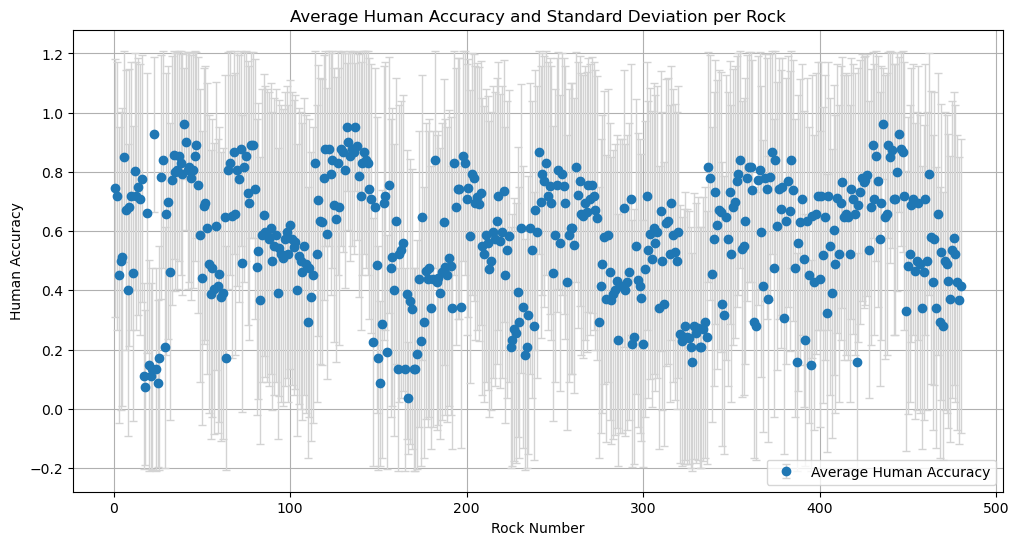

In [541]:
plt.figure(figsize=(12, 6))
plt.errorbar(k['Rock number'], k["human_accuracy"], yerr=k["human_sd"], fmt='o', ecolor='lightgray',
             elinewidth=1, capsize=3, label='Average Human Accuracy')

plt.xlabel("Rock Number")
plt.ylabel("Human Accuracy")
plt.title("Average Human Accuracy and Standard Deviation per Rock")
plt.legend()
plt.grid(True)
plt.show()

**Add the accuracy of your model for each of those rocks.**

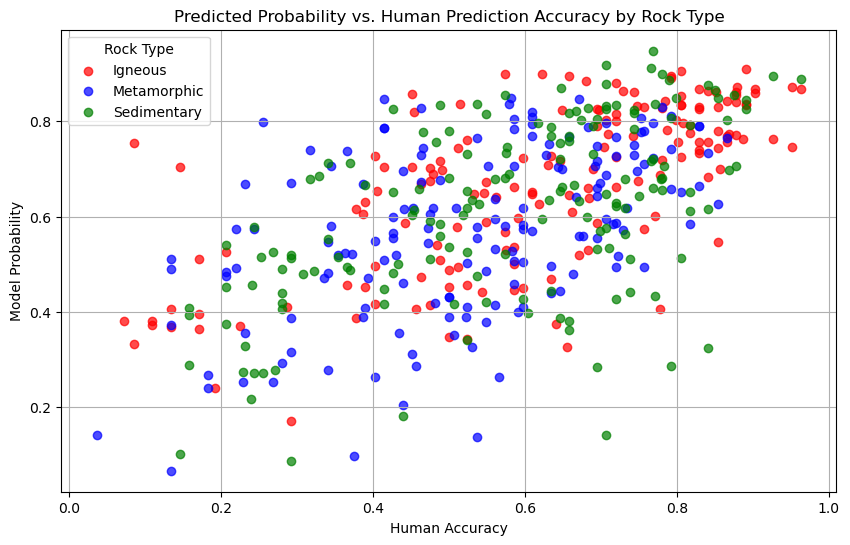

In [405]:
# Define category mapping and colors
category_labels = {1: 'Igneous', 2: 'Metamorphic', 3: 'Sedimentary'}
category_colors = {'Igneous': 'red', 'Metamorphic': 'blue', 'Sedimentary': 'green'}

# Map 'y' to category labels and colors
k['category'] = k['y'].map(category_labels)
k['color'] = k['category'].map(category_colors)

# Plotting
plt.figure(figsize=(10, 6))
for category, color in category_colors.items():
    subset = k[k['category'] == category]
    plt.scatter(
        subset['human_accuracy'],
        subset['y_pred_proba_bestmodel'],
        c=color,
        label=category,
        alpha=0.7
    )

# Customizing plot
plt.xlabel("Human Accuracy")
plt.ylabel("Model Probability")
plt.title("Predicted Probability vs. Human Prediction Accuracy by Rock Type")
plt.legend(title="Rock Type")
plt.grid(True)
plt.show()


**Discuss if your model making similar errors as humans?**

In [420]:
correlation_coeff, p_value = stats.pearsonr(k['y_pred_proba_bestmodel'], k['human_accuracy'])
# Display the results
print("Correlation Coefficient:", correlation_coeff)
print("P-value:", p_value)
# Interpret significance
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation Coefficient: 0.6004900643281245
P-value: 2.3091850576320487e-48
The correlation is statistically significant.


The correlation coefficient of 0.6005 and a p-value of 2.31e-48 indicate a significant moderate positive correlation between the model's predicted probabilities and human accuracy. While the model tends to make similar errors as humans, it outperforms human accuracy in certain instances, particularly in the top left quadrant of the graph. Notably, the model shows better performance for some igneous rock samples. This highlights that despite the overall correlation, the model can still excel beyond human predictions in specific cases.

# References:

[1] Hands-On-Machine-Learning-with-Scikit-Learn-and-TensorFlow 2nd Online Edition.

[2] https://chatgpt.com/